In [2]:
import pandas as pd
import numpy as np
import math
from collections import defaultdict
import ts_code.nsfg as nsfg
import ts_code.thinkstats2 as thinkstats2
import matplotlib.pyplot as plt
%matplotlib inline

## Chapter 3 - Probability mass functions

Another way to represent a distribution is a **probability mass function (PMF)**, which maps from each value to its probability. A **probability** is a frequency expressed as a fraction of the sample size, n. To get from frequencies to probabilities, we divide through by n, which is called **normalization**.

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [3]:
first = live[(live.birthord == 1) & (live.prglngth >= 27) & (live.prglngth <= 45)]
others = live[(live.birthord != 1) & (live.prglngth >= 27) & (live.prglngth <= 45)]

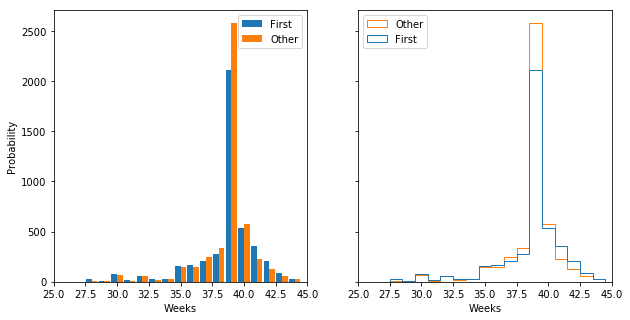

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey = True, figsize=(10, 5))
ax1.hist([first['prglngth'], others['prglngth']], bins = range(46), histtype="bar", label=("First", "Other"), rwidth = 0.90, align= 'left')
ax2.hist([first['prglngth'], others['prglngth']], bins = range(46), histtype="step", label=("First", "Other"), rwidth = 0.90, align= 'left')
ax1.set_xlim(25, 45)
ax2.set_xlim(25, 45)
ax1.set_xlabel("Weeks")
ax2.set_xlabel("Weeks")
ax1.set_ylabel("Probability")

ax1.legend()
ax2.legend(loc=2);

Histograms and PMFs are useful to identify patterns and relationships. Once we have an idea of what is going on, a good next step is to design a visualization that makes the identified pattern clear.

For the NSFG data, the biggest difference are near the mode, so let's zoom in on that area of the graph.

In the code below we calculate the difference in percentage points of pregenancy lengths for a range of weeks from 35 to 45.

In [8]:
weeks = range(35,46)
diffs = []
for week in weeks:
    p1 = thinkstats2.Pmf(first['prglngth']).Prob(week)
    p2 = thinkstats2.Pmf(others['prglngth']).Prob(week)
    diff = 100 * (p1-p2)
    diffs.append(diff)

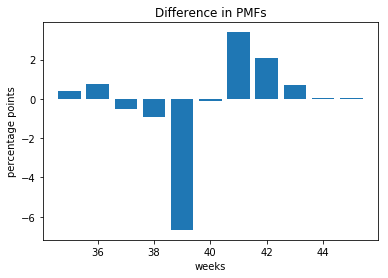

In [9]:
plt.bar(weeks, diffs)
plt.title('Difference in PMFs')
plt.xlabel('weeks')
plt.ylabel('percentage points');

This figure makes the pattern clearer: first babies are less likely to be born
in week 39, and somewhat more likely to be born in weeks 41 and 42.

For now we should hold this conclusion only tentatively.

At many American colleges and universities, the student-to-faculty ratio is about 10:1. But students are often surprised to discover that their average class size is bigger than 10. There are two reasons for the discrepancy:

+ Students typically take 4-5 classes per semester, but professors often teach 1 or 2.
+ The number of students who enjoy a small class is small, but the number of students in a large class is (ahem!) large.

The first effect is obvious, at least once it is pointed out; the second is more
subtle. Let's look at an example. 

Suppose that a college offers 65 classes in a given semester, with the following distribution of sizes:

|size| count
| :---: | :-----:
|5-9| 8
|10-14| 8
|15-19| 14
|20-24| 4
|25-29| 6
|30-34| 12
|35-39| 8
|40-44| 3
|45-49| 2

So, whats the average class size?

In [10]:
classes = pd.DataFrame.from_dict({ 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }, orient = 'index')
classes.reset_index(inplace = True)
classes.columns = ['class_size', 'freq']
classes['prob'] = classes['freq'] / classes['freq'].sum()

In [11]:
classes

,class_size,freq,prob
0,7,8,0.123077
1,12,8,0.123077
2,17,14,0.215385
3,22,4,0.061538
4,27,6,0.092308
5,32,12,0.184615
6,37,8,0.123077
7,42,3,0.046154
8,47,2,0.030769


If you ask the Dean for the average class size, he would construct a PMF,
compute the mean, and report that the average class size is 23.7.

In [12]:
np.average(classes["class_size"], weights=classes["prob"])

23.692307692307693

But if you survey a group of students, ask them how many students are in their classes, and compute the mean, you would think the average class was bigger.
Let's see how much bigger.

For each class size, x, we multiply the probability by x, the number of students
who observe that class size.

In [13]:
new_prob = classes["class_size"] * classes["prob"]
classes['observed_prob'] = new_prob / sum(new_prob)

In [14]:
np.average(classes["class_size"], weights=classes["observed_prob"])

29.123376623376622

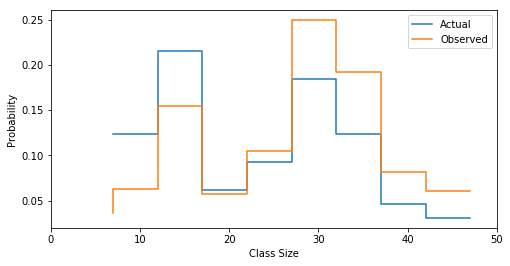

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.step(classes['class_size'], classes['prob'], label="Actual")
ax.step(classes['class_size'], classes['observed_prob'], label="Observed")

ax.set_xlim(0, 50)
ax.set_xlabel("Class Size")
ax.set_ylabel("Probability")

ax.legend();

It is also possible to invert this operation. Suppose you want to find the
distribution of class sizes at a college, but you can't get reliable data from the Dean. An alternative is to choose a random sample of students and ask how many students are in their classes.

The result would be biased for the reasons we've just seen, but you can use it
to estimate the actual distribution.

To unbias our biased student responses we would just multiply the probabilities by 1 over the class size.

In [16]:
old_prob = classes['observed_prob']  * (1/classes['class_size'] )
old_prob/sum(old_prob)

0    0.123077
1    0.123077
2    0.215385
3    0.061538
4    0.092308
5    0.184615
6    0.123077
7    0.046154
8    0.030769
dtype: float64

In [17]:
classes['prob']

0    0.123077
1    0.123077
2    0.215385
3    0.061538
4    0.092308
5    0.184615
6    0.123077
7    0.046154
8    0.030769
Name: prob, dtype: float64

### Exercises

**Exercise 3.1** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [18]:
resp = nsfg.ReadFemResp()

In [19]:
num_children = resp.numkdhh
hist = {}
for i, val in num_children.value_counts().items():
    hist[i] = val

In [20]:
numk = pd.DataFrame.from_dict(hist, orient='index').reset_index()
numk.columns = ['num_kids', 'freq']
numk['prob'] = numk['freq'] / numk['freq'].sum()

new_prob = numk["num_kids"] * numk["prob"]
numk['children_sur_prob'] = new_prob / sum(new_prob)

In [21]:
numk

,num_kids,freq,prob,children_sur_prob
0,0,3563,0.466178,0.000000
1,1,1636,0.214052,0.208993
2,2,1500,0.196258,0.383240
3,3,666,0.087139,0.255238
4,4,196,0.025644,0.100153
5,5,82,0.010729,0.052376


In [22]:
avg_kids_actual = np.average(numk["num_kids"], weights=numk["prob"])
avg_kids_obs = np.average(numk["num_kids"], weights=numk["children_sur_prob"])

print('Actual mean: %.02f \nObserved mean: %.02f' % (avg_kids_actual, avg_kids_obs))

Actual mean: 1.02 
Observed mean: 2.40


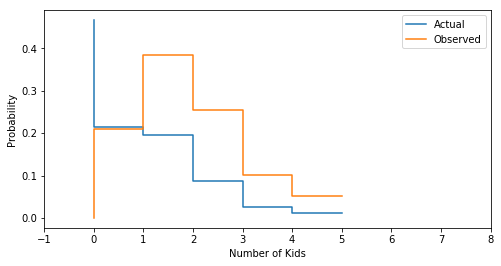

In [23]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.step(numk["num_kids"], numk['prob'], label="Actual")
ax.step(numk["num_kids"], numk['children_sur_prob'], label="Observed")

ax.set_xlim(-1, 8)
ax.set_xlabel("Number of Kids")
ax.set_ylabel("Probability")

ax.legend();

**Exercise 3.2** In Section 2.7 we computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different:

$$\bar{x} = \sum_{i} p_{i}x_{i}$$

where $x_{i}$ are the unique values in the PMF and $p_{i} - PMF(x_{i})$. We can also compute the variance from a PMF;

$$\sigma^{2} = \sum_{i} p_{i}(x_{i} - \bar{x})^{2}$$

Write functions called *PmfMean* and *PmfVar* that take a PMF object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [24]:
#weighted np.average actually provides the mean as definied above

def PmfMean(vals, probs):
    pmfmean = np.average(vals, weights = probs)
    return pmfmean

def PmfVar(vals, probs):
    pmfmean = PmfMean(vals, probs)
    sqrdDiff = (vals - pmfmean)**2
    var = np.sum(probs * sqrdDiff)
    return var

In [25]:
np.average(numk["num_kids"], weights=numk["prob"])

1.0242051550438309

In [26]:
PmfMean(numk["num_kids"], numk["prob"])

1.0242051550438309

In [27]:
PmfVar(numk["num_kids"], numk["prob"])

1.4128643263531193

**Exercise 3.3** I started with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of
babies, but I ignored the possibility that there might be a difference between
first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

In [28]:
preg_map = nsfg.MakePregMap(live)

In [29]:
caseids = set(live[live['birthord'] >= 2].caseid.values)
diff_dict = defaultdict(list)
for ci in caseids:
    for i in preg_map[ci]:
        if live['birthord'][i] == 1:
            first = live['prglngth'][i]
        else:
            diff = live['prglngth'][i] - first
            diff_dict[ci].append(diff)

In [30]:
avg_diffs = defaultdict(int)
for key, val in diff_dict.items():
    avg_diffs[key] = np.average(val)

In [31]:
prglngth_diff = pd.DataFrame([diff_dict, avg_diffs]).T
prglngth_diff.reset_index(inplace = True)
prglngth_diff.columns = ['caseid', 'prglngth_diff(ea)', 'avg_diff']

In [32]:
prglngth_diff.head()

,caseid,prglngth_diff(ea),avg_diff
0,1,[0],0
1,2,"[0, 0]",0
2,6,"[2, 4]",3
3,7,[-4],-4
4,14,[-2],-2


In [33]:
prglngth_diff['avg_diff'].mean() * (24 * 7) #hours*days in a week

-19.837392716307129

On average first babies arrive 19.837 hours later than the subsequent babies each mother has. That's almost a whole day later, but still only about 0.3% of a typical pregnancy. 

3.4

In [1]:
import ts_code.relay as relay

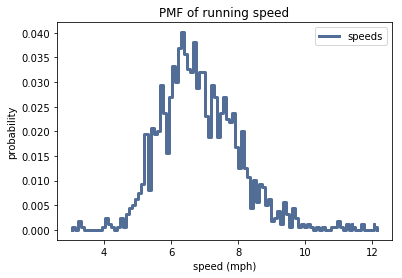

In [3]:
pmf = relay.main();

In [4]:
pmf_dict = {}
for speed in pmf:
    pmf_dict[speed] = pmf[speed]   

In [5]:
runners = pd.DataFrame.from_dict(pmf_dict, orient = 'index')
runners.reset_index(inplace = True)
runners.columns = ['speed', 'prob']
runners['speed'] = runners["speed"][:82]

In [6]:
def ObservedPMF(df, speed):
    diff_speed = abs(df['speed'] - speed)
    new_prob = diff_speed * df['prob']
    speed_df = df[['speed', 'prob']]
    speed_df['prob2'] = new_prob / sum(new_prob)
    return speed_df

In [7]:
df = ObservedPMF(runners, 7.0)

In [8]:
np.average(runners["speed"], weights=runners["prob"])

6.8413533834586477

In [9]:
np.average(df["speed"], weights=df["prob2"])

6.9096085959652154

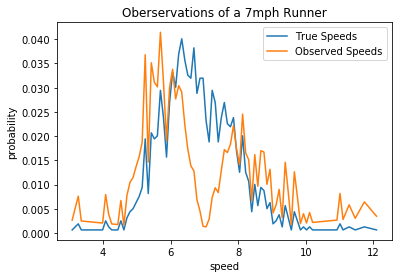

In [10]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, sharey = True, figsize=(10, 5))
plt.plot(runners['speed'], runners['prob'], label = 'True Speeds')
plt.plot(df['speed'], df['prob2'], label = 'Observed Speeds')
plt.xlabel('speed')
plt.ylabel('probability')
plt.title("Oberservations of a 7mph Runner")
plt.legend();

## Glossary

**Probability mass function (PMF):** a representation of a distribution as a function that maps from values to probabilities.

**probability:** A frequency expressed as a fraction of the sample size.

**normalization:** The process of dividing a frequency by a sample size to get a probability.

**index:** In a pandas DataFrame, the index is a special column that contains the row labels.